In [47]:
import torch
import matplotlib.pyplot as plt
def quantize_weight(x):
    led_weights_quantize=x*(x>1)+x*(x<=0)
    for i_quantize in range(2**quantBit):
        
        mask_quantize=(x>(i_quantize)/(2**quantBit))*(x<=(i_quantize+1)/(2**quantBit))
        bias=7
        beta=256
        # bias=4.5
        # beta=150
        # weight_quantize=((1/(1+torch.exp(-(beta*(x-i_quantize/(2**quantBit))-bias))))+(i_quantize))/(2**quantBit)
        weight_quantize=((1/(1+torch.exp(-(beta*(x)-bias))))+(i_quantize))/(2**quantBit)
        led_weights_quantize=led_weights_quantize+weight_quantize*mask_quantize

    return led_weights_quantize    

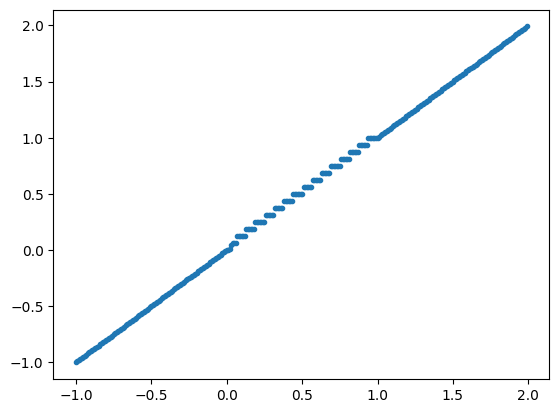

In [48]:
x=torch.arange(-1, 2,0.01)
# x=torch.ones(10)
quantBit=4
y= quantize_weight(x)

plt.figure()
plt.plot(x,y,'.')
plt.show()
